# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from sortedcontainers import SortedSet
%matplotlib inline

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

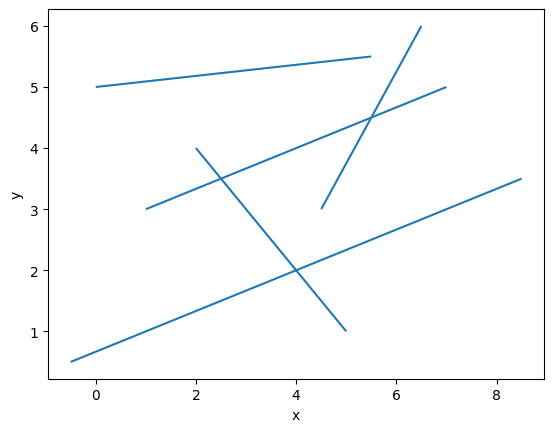

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

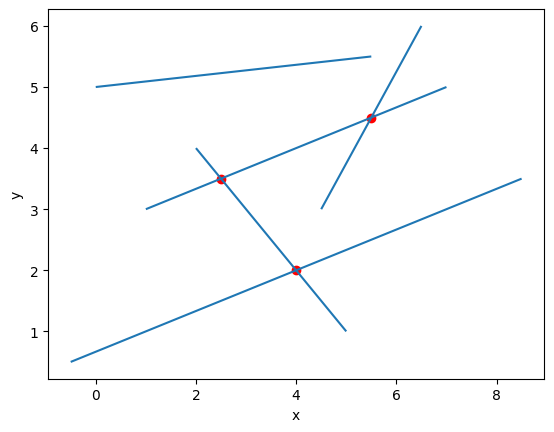

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    lista = []
    licznik = 0
    u_x = set()
    while licznik < n:
        x1 = np.random.uniform(0,max_x)
        y1 = np.random.uniform(0,max_y)
        x2 = np.random.uniform(0,max_x)
        y2 = np.random.uniform(0,max_y)
        
        while x1 == x2:
            x2 = np.random.uniform(0,max_x)
        if x1 > x2:
            while x1 in u_x and x1 != x2:
                x1 = np.random.uniform(x2,max_x)
            x1, x2, y1, y2 = x2, x1, y2, y1
        else:
            while x2 in u_x and x1 != x2:
                x2 = np.random.uniform(x1,max_x)

        

        lista.append(((x1, y1), (x2, y2)))
        licznik+=1


    return lista

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.094s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
pkt = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

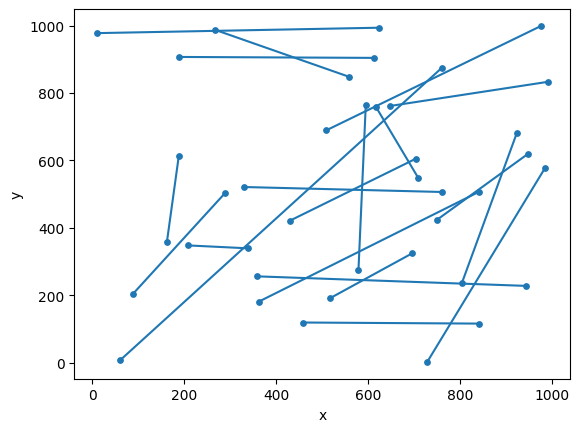

In [8]:
vis=Visualizer()
vis.add_line_segment(pkt)
vis.add_point([pkt[i//2][i%2] for i in range(2*len(pkt))],s=15)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [9]:
%matplotlib tk
def add_sections():
    """
    Funkcja umożliwia rysowanie odcinków poprzez klikanie na wykresie.
    - Lewy przycisk myszy: dodaje punkt końcowy odcinka.
    - Prawy przycisk myszy: kończy rysowanie (jeśli liczba punktów jest parzysta).
    """
    points = []
    used_end_x = set()  # Zbiór przechowujący wartości x użyte jako końcowe
    active = True

    def draw_line(points):
        """
        Rysuje odcinek między dwoma punktami.
        """
        ax = plt.gca()
        x = [points[0][0], points[1][0]]
        y = [points[0][1], points[1][1]]
        ax.plot(x, y, color="green")
        ax.figure.canvas.draw()

    def func(click):
        nonlocal active
        if active:
            if click.button == 1:
                x, y = click.xdata, click.ydata
                if x is not None and y is not None:
                    # Sprawdzamy pionowe odcinki
                    if len(points) % 2 == 1 and x == points[-1][0]:
                        ax.set_title("Błąd: Pionowe odcinki są niedozwolone")
                        plt.draw()
                        return
                    # Sprawdzamy, czy x końcowy nie był już użyty
                    if len(points) % 2 == 1 and x in used_end_x:
                        ax.set_title("Błąd: Punkt końcowy x był już użyty jako końcowy")
                        plt.draw()
                        return
                    # Dodajemy punkt
                    points.append((x, y))
                    plt.scatter(x, y, color="red")
                    plt.draw()
                    if len(points) % 2 == 0:
                        # Dodajemy x końcowy odcinka do zbioru
                        used_end_x.add(points[-1][0])
                        draw_line([points[-2], points[-1]])
            elif click.button == 3 and len(points) % 2 == 0:
                active = False
                ax.set_title("Rysowanie zakończone")
                plt.draw()
                plt.pause(1)
                plt.close()

    fig, ax = plt.subplots()
    plt.get_current_fig_manager().set_window_title("Rysowanie Odcinków")
    connection_id = fig.canvas.mpl_connect("button_press_event", func)

    ax.set_xlim([0, 1000])
    ax.set_ylim([0, 1000])
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.ion()
    plt.show()

    return points


In [10]:
wygenerowane1 = add_sections()

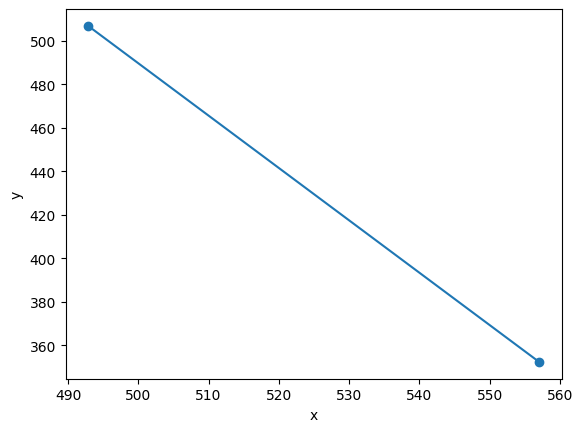

In [11]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane1)
vis.add_point([wygenerowane1[i//2][i%2] for i in range(2*len(wygenerowane1))])
vis.show()

Uzupełnij funkcję ```is_intersection```

In [67]:
#tworzymy klase punktow na plaszczyznie
class Coordinate:
    def __init__(self, px, py):
        self.px = px  #przechowujemy wspolrzedna pozioma
        self.py = py  #przechowujemy wspolrzedna pionowa

    def __eq__(self, other): #metoda ktora ma za zadanie sprawdzic czy punkty sa takie same
        return self.px == other.px and self.py == other.py

    def __gt__(self, other): #metoda ktora sprawdza czy x punktu wiekszy od drugiego x-a
        return self.px > other.px

    def __hash__(self): #metoda hashujaca
        return hash((self.px, self.py))


class Segment: #klasa segmentu reprezentujaca odcinki na plaszczyznie
    def __init__(self, start_coord, end_coord):
        self.start = start_coord #przypisanie
        self.end = end_coord #przypisanie
        self.slope = (self.start.py - self.end.py) / (self.start.px - self.end.px) #liczymy nachylenie odcinka
        self.intercept = self.start.py - self.slope * self.start.px #punkt przeciecia z oy
        self.global_x = self.start.px

    @staticmethod
    def redefine_x(new_x):
        Segment.global_x = new_x

    def __eq__(self, other):
        return (self.start == other.start and self.end == other.end)

    def __gt__(self, other):
        # Porównywanie pozycji segmentów dla aktualnej linii pionowej x
        return self.slope * Segment.global_x + self.intercept > other.slope * Segment.global_x + other.intercept

    def __hash__(self):
        return hash((self.start, self.end))


def orientation(p, q, r):

    # Funkcja zwraca orientację trójki punktów (p, q, r):
    # 0 - punkty są kolinearne
    # 1 - ułożenie przeciwnie do ruchu wsk. zegara (CCW)
    # -1 - ułożenie zgodne z ruchem wsk. zegara (CW)

    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-9:
        return 0
    elif val > 0:
        return 1
    else:
        return -1


def on_segment(p, q, r):
    #Sprawdza czy punkt q leży na odcinku pr
    if (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1])):
        return True
    return False


def segments_intersect_det(p1, q1, p2, q2):
    #Sprawdza czy odcinki (p1, q1) i (p2, q2) się przecinaja

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    #ogol
    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False


def is_intersection(segments_input):
    #deklaracja SortedSet do przechowywania aktywnych odcinkow
    active_segments = SortedSet()
    events = SortedSet() #pusty SortedSet do przechowywania zdarzen
    total = len(segments_input) #liczba odcinkow
    already_checked = set() #przechowuje te sprawdzone
    segment_objects = [] #pusta lista do przechowywania obiektow Segment utworzonych na poczatku

    # Tworzenie obiektów Segment i kolejki zdarzeń
    for idx in range(total): #iterujemy przez kazdy odcinek
        start_c = Coordinate(segments_input[idx][0][0], segments_input[idx][0][1]) #poczatek odcinka tworzymy obiekt klasy
        end_c = Coordinate(segments_input[idx][1][0], segments_input[idx][1][1]) #koniec odcinka tworzymy obiekt klasy
        # punkt paczatkowy ma miec mniejsza wartosc x niz koncowy
        if start_c.px > end_c.px:
            start_c, end_c = end_c, start_c
        segment_objects.append(Segment(start_c, end_c))
        events.add((start_c, 'start', idx))
        events.add((end_c, 'end', idx))

    #glowna petla
    while len(events) > 0: #dopoki sa zdarzenia do przetworzenia
        e = events.pop(0) #zdjecie pierwszego
        new_pairs_to_check = []

        if e[1] == 'start': #jesli poczatek odcinka
            Segment.redefine_x(e[0].px)
            active_segments.add((segment_objects[e[2]], e[2])) #do aktywnych odcinkow
            curr_idx = active_segments.index((segment_objects[e[2]], e[2])) #pobiera indeks odcinka w zbiorze active_segments

            if curr_idx > 0: #czy na poczatku zbioru aktywnych odcinkow
                up_idx = active_segments[curr_idx - 1][1] #pobiera indeks odcinka bedacego powyzej aktualnie dodanego odcinka
                pair_min, pair_max = min(up_idx, e[2]), max(up_idx, e[2])
                if (pair_min, pair_max) not in already_checked: #sprawdzamy czy juz sprawdzalismy dana pare
                    already_checked.add((pair_min, pair_max)) #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia
            if curr_idx < len(active_segments) - 1: #jesli to nie ostatni odcinek
                down_idx = active_segments[curr_idx + 1][1] #sprawdzamy bezposrednio poniej odcinek
                pair_min, pair_max = min(down_idx, e[2]), max(down_idx, e[2])
                if (pair_min, pair_max) not in already_checked: #sprawdzamy czy juz sprawdzalismy dana pare
                    already_checked.add((pair_min, pair_max))#dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max))#dodajemy do sprawdzenia

        elif e[1] == 'end':#jesli koniec odcinka
            Segment.redefine_x(e[0].px) # aktualizuje aktualna pozycje linii przeszukujacej do x punktu końcowego odcinka
            pos_to_remove = active_segments.index((segment_objects[e[2]], e[2])) #znajdujemy pozycje w aktywnych zeby usunac
            #po usunieciu trzeba sprawdzic czy powstale 2 nowe odcinki nie tworza przeciecia
            if pos_to_remove > 0 and pos_to_remove < len(active_segments) - 1: #sprawdzamy czy ma sasiadow z gory i dolu
                upper_idx = active_segments[pos_to_remove - 1][1] #indeks powyzej odcinka
                lower_idx = active_segments[pos_to_remove + 1][1] #indeks ponizej odcinka
                pair_min, pair_max = min(upper_idx, lower_idx), max(upper_idx, lower_idx) #tworzy uporzadkowana pare indeksow
                if (pair_min, pair_max) not in already_checked: #jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max))   #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia
            del active_segments[pos_to_remove] #usuwa odcinek z zbioru aktywnych odcinkow


        # Sprawdź nowe potencjalne przecięcia za pomocą metod wyznacznikowych
        for (seg_a_idx, seg_b_idx) in new_pairs_to_check:
            seg_a = segment_objects[seg_a_idx]
            seg_b = segment_objects[seg_b_idx]

            p1 = (seg_a.start.px, seg_a.start.py)
            q1 = (seg_a.end.px, seg_a.end.py)
            p2 = (seg_b.start.px, seg_b.start.py)
            q2 = (seg_b.end.px, seg_b.end.py)

            if segments_intersect_det(p1, q1, p2, q2):
                # Jeśli znaleźliśmy chociaż jedno przecięcie, zwracamy True
                return True

    #brak przeciez i koniec petli
    return False

In [68]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Uzupełnij funkcję ```is_intersection_with_visualization```

In [69]:
class Coordinate:
    def __init__(self, px, py):
        self.px = px
        self.py = py
        
    def __eq__(self, other):
        return self.px == other.px and self.py == other.py
    
    def __gt__(self, other):
        return self.px > other.px
    
    def __hash__(self):
        return hash((self.px, self.py))


class Segment:
    def __init__(self, start_coord, end_coord):
        # Załóżmy, że start_coord.x < end_coord.x
        self.start = start_coord
        self.end = end_coord
        self.slope = (self.start.py - self.end.py) / (self.start.px - self.end.px)
        self.intercept = self.start.py - self.slope * self.start.px
        self.global_x = self.start.px
        
    def redefine_x(new_x):
        Segment.global_x = new_x

    def __eq__(self, other):
        return (self.start == other.start and self.end == other.end)
    
    def __gt__(self, other):
        return self.slope * Segment.global_x + self.intercept > other.slope * Segment.global_x + other.intercept
    
    def __hash__(self):
        return hash((self.start, self.end))


def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-9:
        return 0
    elif val > 0:
        return 1
    else:
        return -1

def on_segment(p, q, r):
    if (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
        min(p[1], r[1]) <= q[1] <= max(p[1], r[1])):
        return True
    return False

def segments_intersect_det(p1, q1, p2, q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False

def find_intersection_point(seg_a, seg_b):
    a1, b1 = seg_a.slope, seg_a.intercept
    a2, b2 = seg_b.slope, seg_b.intercept
    x_min_a, x_max_a = seg_a.start.px, seg_a.end.px
    x_min_b, x_max_b = seg_b.start.px, seg_b.end.px
    
    if a1 == a2:
        return None
    cross_x = (b2 - b1) / (a1 - a2)
    if max(x_min_a, x_min_b) < cross_x < min(x_max_a, x_max_b):
        cross_y = a2 * cross_x + b2
        return (cross_x, cross_y)
    return None


def is_intersection_with_visualization(segments_input):
    """
    Funkcja sprawdza, czy występuje jakiekolwiek przecięcie podanych segmentów i tworzy wizualizację.
    Dodano pionową czerwoną linię symbolizującą miotłę.
    """
    vis = Visualizer()
    vis.add_title("Wizualizacja sprawdzania przecięć z linią zamiatającą")
    vis.add_grid()
    
    active_segments = SortedSet()
    events = SortedSet()
    already_checked = set()
    segment_objects = []
    
    # Wyznaczamy min_y i max_y, aby czerwona linia pionowa pokazywała się przez cały obszar
    all_points = []
    for seg_def in segments_input:
        all_points.append(seg_def[0])
        all_points.append(seg_def[1])
    min_y = min(p[1] for p in all_points) - 1
    max_y = max(p[1] for p in all_points) + 1

    #dodajemy segmenty do wizualizacji
    for idx, seg_def in enumerate(segments_input):
        start_c = Coordinate(seg_def[0][0], seg_def[0][1])
        end_c = Coordinate(seg_def[1][0], seg_def[1][1])
        if start_c.px > end_c.px:
            start_c, end_c = end_c, start_c
        s = Segment(start_c, end_c)
        segment_objects.append(s)
        
        vis.add_point((start_c.px, start_c.py), color="black")
        vis.add_point((end_c.px, end_c.py), color="black")
        vis.add_line_segment([(start_c.px, start_c.py), (end_c.px, end_c.py)], color="gray")
        
        events.add((start_c, 'start', idx))
        events.add((end_c, 'end', idx))

    found_intersection = False

    def draw_sweep_line(x):
        #Pionowa czerwona miotla rysujemy
        vis.add_line_segment([(x, min_y), (x, max_y)], color="red")

    while len(events) > 0:
        e = events.pop(0)
        new_pairs_to_check = []
        
        #Aktualizacja pozycji miotly
        Segment.redefine_x(e[0].px)
        draw_sweep_line(Segment.global_x)  #Rysujemy linie miotly po kazdej zmianie
        
        if e[1] == 'start':
            active_segments.add((segment_objects[e[2]], e[2]))
            curr_idx = active_segments.index((segment_objects[e[2]], e[2]))
            if curr_idx > 0:
                up_idx = active_segments[curr_idx - 1][1]
                pair_min, pair_max = min(up_idx, e[2]), max(up_idx, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            if curr_idx < len(active_segments) - 1:
                down_idx = active_segments[curr_idx + 1][1]
                pair_min, pair_max = min(down_idx, e[2]), max(down_idx, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
        
        elif e[1] == 'end':
            pos_to_remove = active_segments.index((segment_objects[e[2]], e[2]))
            if pos_to_remove > 0 and pos_to_remove < len(active_segments) - 1:
                upper_idx = active_segments[pos_to_remove - 1][1]
                lower_idx = active_segments[pos_to_remove + 1][1]
                pair_min, pair_max = min(upper_idx, lower_idx), max(upper_idx, lower_idx)
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            del active_segments[pos_to_remove]

        
        
        for (seg_a_idx, seg_b_idx) in new_pairs_to_check:
            seg_a = segment_objects[seg_a_idx]
            seg_b = segment_objects[seg_b_idx]

            p1 = (seg_a.start.px, seg_a.start.py)
            q1 = (seg_a.end.px, seg_a.end.py)
            p2 = (seg_b.start.px, seg_b.start.py)
            q2 = (seg_b.end.px, seg_b.end.py)

            if segments_intersect_det(p1, q1, p2, q2):
                found_intersection = True
                intersection_pt = find_intersection_point(seg_a, seg_b)
                if intersection_pt is not None:
                    vis.add_point(intersection_pt, color="black")
                    vis.add_line_segment([(seg_a.start.px, seg_a.start.py),
                                          (seg_a.end.px, seg_a.end.py)], color="green")
                    vis.add_line_segment([(seg_b.start.px, seg_b.start.py),
                                          (seg_b.end.px, seg_b.end.py)], color="green")
                    
                    return found_intersection, vis

    return found_intersection, vis


Uzupełnij funkcję ```find_intersections```

In [90]:
class Coordinate:
    def __init__(self, px, py):
        self.px = px  #przechowujemy wspolrzedna pozioma
        self.py = py  #przechowujemy wspolrzedna pionowa

    def __eq__(self, other): #metoda ktora ma za zadanie sprawdzic czy punkty sa takie same
        return self.px == other.px and self.py == other.py

    def __gt__(self, other): #metoda ktora sprawdza czy x punktu wiekszy od drugiego x-a
        return self.px > other.px

    def __hash__(self): #metoda hashujaca
        return hash((self.px, self.py))


class Segment: #klasa segmentu reprezentujaca odcinki na plaszczyznie
    def __init__(self, start_coord, end_coord):
        self.start = start_coord #przypisanie
        self.end = end_coord #przypisanie
        self.slope = (self.start.py - self.end.py) / (self.start.px - self.end.px) #liczymy nachylenie odcinka
        self.intercept = self.start.py - self.slope * self.start.px #punkt przeciecia z oy
        self.global_x = self.start.px

    def redefine_x(new_x):
        Segment.global_x = new_x

    def __eq__(self, other):
        return (self.start == other.start and self.end == other.end)

    def __gt__(self, other):
        # Porównywanie pozycji segmentów dla aktualnej linii pionowej x
        return self.slope * Segment.global_x + self.intercept > other.slope * Segment.global_x + other.intercept

    def __hash__(self):
        return hash((self.start, self.end))


def orientation(p, q, r):
    """
    Funkcja zwraca orientację trójki punktów (p, q, r):
    0 - punkty są kolinearne
    1 - ułożenie przeciwnie do ruchu wsk. zegara (CCW)
    -1 - ułożenie zgodne z ruchem wsk. zegara (CW)
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-9:
        return 0
    elif val > 0:
        return 1
    else:
        return -1


def on_segment(p, q, r):
    #Sprawdza czy punkt q leży na odcinku pr
    if (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1])):
        return True
    return False


def segments_intersect_det(p1, q1, p2, q2):
    #Sprawdza czy odcinki (p1, q1) i (p2, q2) się przecinaja

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    #ogol
    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False


def segment_intersection_check(seg_a, seg_b):
    #zwracamy punkt przeciecia 2 segmentow albo None jak jest jego brak
    (a1, b1) = (seg_a.slope, seg_a.intercept)
    (a2, b2) = (seg_b.slope, seg_b.intercept)
    (x_min_a, x_max_a) = (seg_a.start.px, seg_a.end.px)
    (x_min_b, x_max_b) = (seg_b.start.px, seg_b.end.px)

    if a1 == a2:
        return None
    cross_x = (b2 - b1) / (a1 - a2)
    if max(x_min_a, x_min_b) < cross_x < min(x_max_a, x_max_b):
        cross_y = a2 * cross_x + b2
        return (cross_x, cross_y)
    return None


def find_intersections(segments_input):
    active_segments = SortedSet()     #deklaracja SortedSet do przechowywania aktywnych odcinkow
    events = SortedSet() #pusty SortedSet do przechowywania zdarzen
    total = len(segments_input)#liczba odcinkow
    already_checked = set()#przechowuje te sprawdzone
    segment_objects = []#pusta lista do przechowywania obiektow Segment utworzonych na poczatku
    intersection_points = [] #przechowujemy przeciecia

    # Tworzenie obiektów Segment i kolejki zdarzeń
    for idx in range(total):#iterujemy przez kazdy odcinek
        start_c = Coordinate(segments_input[idx][0][0], segments_input[idx][0][1])  #poczatek odcinka tworzymy obiekt klasy
        end_c = Coordinate(segments_input[idx][1][0], segments_input[idx][1][1]) #koniec odcinka tworzymy obiekt klasy
        if start_c.px > end_c.px:         # punkt paczatkowy ma miec mniejsza wartosc x niz koncowy
            start_c, end_c = end_c, start_c
        segment_objects.append(Segment(start_c, end_c)) #dodajemy do listy segment
        events.add((start_c, 'start', idx)) #do eventow dodajemy pocz odcinka
        events.add((end_c, 'end', idx)) # #do eventow dodajemy koniec odc

    #glowna petla
    while len(events) > 0:  #dopoki sa zdarzenia do przetworzenia
        e = events.pop(0) #zdjecie pierwszego
        new_pairs_to_check = []

        if e[1] == 'start': #jesli poczatek odcinka
            Segment.redefine_x(e[0].px)
            active_segments.add((segment_objects[e[2]], e[2])) #do aktywnych odcinkow
            curr_idx = active_segments.index((segment_objects[e[2]], e[2])) #pobiera indeks odcinka w zbiorze active_segments
            # Sprawdź sąsiednie segmenty w liście aktywnych
            if curr_idx > 0: #czy na poczatku zbioru aktywnych odcinkow
                up_idx = active_segments[curr_idx - 1][1] #pobiera indeks odcinka bedacego powyzej aktualnie dodanego odcinka
                pair_min, pair_max = min(up_idx, e[2]), max(up_idx, e[2]) #tworzy uporzadkowana pare indeksow
                if (pair_min, pair_max) not in already_checked: #sprawdzamy czy juz sprawdzalismy dana pare
                    already_checked.add((pair_min, pair_max))  #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia
            if curr_idx < len(active_segments) - 1:  #jesli to nie ostatni odcinek
                down_idx = active_segments[curr_idx + 1][1] #sprawdzamy bezposrednio poniej odcinek
                pair_min, pair_max = min(down_idx, e[2]), max(down_idx, e[2])
                if (pair_min, pair_max) not in already_checked: #sprawdzamy czy juz sprawdzalismy dana pare
                    already_checked.add((pair_min, pair_max)) #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia

        elif e[1] == 'end': #jesli koniec odcinka
            Segment.redefine_x(e[0].px)  # aktualizuje aktualna pozycje linii przeszukujacej do x punktu końcowego odcinka
            pos_to_remove = active_segments.index((segment_objects[e[2]], e[2])) #znajdujemy pozycje w aktywnych zeby usunac
            #po usunieciu trzeba sprawdzic czy powstale 2 nowe odcinki nie tworza przeciecia
            if pos_to_remove > 0 and pos_to_remove < len(active_segments) - 1: #sprawdzamy czy ma sasiadow z gory i dolu
                upper_idx = active_segments[pos_to_remove - 1][1] #indeks powyzej odcinka
                lower_idx = active_segments[pos_to_remove + 1][1] #indeks ponizej odcinka
                pair_min, pair_max = min(upper_idx, lower_idx), max(upper_idx, lower_idx) #tworzy uporzadkowana pare indeksow
                if (pair_min, pair_max) not in already_checked: #jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max)) #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia
            del active_segments[pos_to_remove] #usuwa odcinek z zbioru aktywnych odcinkow

        else: #w innym przypadku niz koniec i pocz odcinka
            # Zdarzenie przecięcia 'i'
            seg1_index = active_segments.index((segment_objects[e[2]], e[2])) #indeks pierwszego odcinka w zbiorze aktywnych odcinków
            seg2_index = active_segments.index((segment_objects[e[3]], e[3])) #indeks drugiego odcinka w zbiorze aktywnych odcinków


            if seg1_index > 0: #sprawdzamy czy odcinek 1 ma sasiada powyzej
                upper_neighbor = active_segments[seg1_index - 1][1] #pobieramy index odcinka wyzej
                pair_min, pair_max = min(upper_neighbor, e[3]), max(upper_neighbor, e[3]) #tworzymy uporzadkowana pare indeksow odcinkow
                if (pair_min, pair_max) not in already_checked: #jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max)) #dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max)) #dodajemy do sprawdzenia
            if seg1_index < len(active_segments) - 1: #sprawdzamy czy odcinek 1 ma sasiada ponizej
                lower_neighbor = active_segments[seg1_index + 1][1] #pobieramy index odcinka nizej
                pair_min, pair_max = min(lower_neighbor, e[3]), max(lower_neighbor, e[3]) #tworzymy uporzadkowana pare indeksow odcinkow
                if (pair_min, pair_max) not in already_checked:#jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max))#dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max))#dodajemy do sprawdzenia

            #sprawdzamy 2 odcinka sasiadow analogicznie
            if seg2_index > 0:#sprawdzamy czy odcinek 2 ma sasiada powyzej
                upper_neighbor = active_segments[seg2_index - 1][1]#pobieramy index odcinka wyzej
                pair_min, pair_max = min(upper_neighbor, e[2]), max(upper_neighbor, e[2])#tworzymy uporzadkowana pare indeksow odcinkow
                if (pair_min, pair_max) not in already_checked:#jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max))#dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max))#dodajemy do sprawdzenia
            if seg2_index < len(active_segments) - 1:#sprawdzamy czy odcinek 2 ma sasiada nizej
                lower_neighbor = active_segments[seg2_index + 1][1]#pobieramy index odcinka nizej
                pair_min, pair_max = min(lower_neighbor, e[2]), max(lower_neighbor, e[2])#tworzymy uporzadkowana pare indeksow odcinkow
                if (pair_min, pair_max) not in already_checked:#jesli ich nie ma juz sprawdzonych
                    already_checked.add((pair_min, pair_max))#dodajemy do sprawdzonych
                    new_pairs_to_check.append((pair_min, pair_max))#dodajemy do sprawdzenia

            #aktualizujemy kolejnosci odcinkow po przecieciu
            if seg1_index < seg2_index:
                del active_segments[seg2_index]
                del active_segments[seg1_index]
            else:
                del active_segments[seg1_index]
                del active_segments[seg2_index]

            Segment.redefine_x(e[0].px + 1e-8)
            active_segments.add((segment_objects[e[2]], e[2]))
            active_segments.add((segment_objects[e[3]], e[3]))

        #nowe pot przeciecia
        for (seg_a_idx, seg_b_idx) in new_pairs_to_check: #iterujemy przez pary do sprawdzenia
            seg_a = segment_objects[seg_a_idx] #pobieramy pierwszy odcinek w parze
            seg_b = segment_objects[seg_b_idx] #-||-

            p1 = (seg_a.start.px, seg_a.start.py) #pkt pocz odcinka 1
            q1 = (seg_a.end.px, seg_a.end.py)#pkt koncowy odcinka 1
            p2 = (seg_b.start.px, seg_b.start.py)#pkt poczatkowy odcinka 2
            q2 = (seg_b.end.px, seg_b.end.py)#pkt koncowy odcinka 2

            #sprawdzamy czy sie przecinaja metoda wyznacznikopw
            if segments_intersect_det(p1, q1, p2, q2):
                #skoro sie przecinaja to mozna wyliczyc miejscie przeciecia
                intersection_pt = segment_intersection_check(seg_a, seg_b)
                if intersection_pt is not None:
                    intersection_points.append((intersection_pt, seg_a_idx + 1, seg_b_idx + 1))
                    events.add((Coordinate(intersection_pt[0], intersection_pt[1]), 'i', seg_a_idx, seg_b_idx))

    return intersection_points



In [91]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [89]:
class Coordinate:
    def __init__(self, px, py):
        self.px = px  #przechowujemy wspolrzedna pozioma
        self.py = py  #przechowujemy wspolrzedna pionowa

    def __eq__(self, other): #metoda ktora ma za zadanie sprawdzic czy punkty sa takie same
        return self.px == other.px and self.py == other.py

    def __gt__(self, other): #metoda ktora sprawdza czy x punktu wiekszy od drugiego x-a
        return self.px > other.px

    def __hash__(self): #metoda hashujaca
        return hash((self.px, self.py))


class Segment: #klasa segmentu reprezentujaca odcinki na plaszczyznie
    def __init__(self, start_coord, end_coord):
        self.start = start_coord #przypisanie
        self.end = end_coord #przypisanie
        self.slope = (self.start.py - self.end.py) / (self.start.px - self.end.px) #liczymy nachylenie odcinka
        self.intercept = self.start.py - self.slope * self.start.px #punkt przeciecia z oy
        self.global_x = self.start.px

    def redefine_x(new_x):
        Segment.global_x = new_x

    def __eq__(self, other):
        return (self.start == other.start and self.end == other.end)

    def __gt__(self, other):
        # Porównywanie pozycji segmentów dla aktualnej linii pionowej x
        return self.slope * Segment.global_x + self.intercept > other.slope * Segment.global_x + other.intercept

    def __hash__(self):
        return hash((self.start, self.end))

def orientation(p, q, r):
    
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-9:
        return 0
    elif val > 0:
        return 1
    else:
        return -1


def on_segment(p, q, r):
    #Sprawdza czy punkt q leży na odcinku pr
    if (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1])):
        return True
    return False


def segments_intersect_det(p1, q1, p2, q2):
    #Sprawdza czy odcinki (p1, q1) i (p2, q2) się przecinaja

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    #ogol
    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False


def segment_intersection_check(seg_a, seg_b):
    #zwracamy punkt przeciecia 2 segmentow albo None jak jest jego brak
    (a1, b1) = (seg_a.slope, seg_a.intercept)
    (a2, b2) = (seg_b.slope, seg_b.intercept)
    (x_min_a, x_max_a) = (seg_a.start.px, seg_a.end.px)
    (x_min_b, x_max_b) = (seg_b.start.px, seg_b.end.px)

    if a1 == a2:
        return None
    cross_x = (b2 - b1) / (a1 - a2)
    if max(x_min_a, x_min_b) < cross_x < min(x_max_a, x_max_b):
        cross_y = a2 * cross_x + b2
        return (cross_x, cross_y)
    return None
def find_intersections_with_visualization(segments_input):
    """
    Funkcja wyznacza wszystkie punkty przecięć segmentów z wizualizacją kroków.
    :param segments_input: lista segmentów w formacie [((x1,y1),(x2,y2)), ((x3,y3),(x4,y4)), ...]
    :return: (lista punktów przecięć, obiekt wizualizera)
    """
    vis = Visualizer()
    vis.add_line_segment(segments_input)
    total = len(segments_input)
    vis.add_point([segments_input[i//2][i%2] for i in range(2*total)], color="blue")

    # Wyznaczanie min_y i max_y
    min_y = min([segments_input[i//2][i%2][1] for i in range(2*total)])
    max_y = max([segments_input[i//2][i%2][1] for i in range(2*total)])

    active_segments = SortedSet()
    events = SortedSet()
    already_checked = set()
    segment_objects = []
    intersection_points = []

    for idx in range(total):
        start_c = Coordinate(segments_input[idx][0][0], segments_input[idx][0][1])
        end_c = Coordinate(segments_input[idx][1][0], segments_input[idx][1][1])
        if start_c.px > end_c.px:
            start_c, end_c = end_c, start_c
        segment_objects.append(Segment(start_c, end_c))
        events.add((start_c, 'start', idx))
        events.add((end_c, 'end', idx))
    
    #glowna petla
    while len(events) > 0:
        e = events.pop(0)

        #linia miotly - broom
        broom = vis.add_line(((e[0].px, min_y), (e[0].px, max_y)), color="red")
        
        new_pairs_to_check = []
        
        if e[1] == 'start':
            Segment.redefine_x(e[0].px)
            active_segments.add((segment_objects[e[2]], e[2]))
            curr_idx = active_segments.index((segment_objects[e[2]], e[2]))

            #wizualizacja startu segmentu
            vis.add_point((e[0].px, e[0].py), color="green", s=25)
            vis.add_line_segment([ (segment_objects[e[2]].start.px, segment_objects[e[2]].start.py),
                                   (segment_objects[e[2]].end.px, segment_objects[e[2]].end.py)], color="green")
            vis.add_point((segment_objects[e[2]].end.px, segment_objects[e[2]].end.py), color="green", s=25)

            if curr_idx > 0:
                up_idx = active_segments[curr_idx - 1][1]
                pair_min, pair_max = min(up_idx, e[2]), max(up_idx, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            if curr_idx < len(active_segments) - 1:
                down_idx = active_segments[curr_idx + 1][1]
                pair_min, pair_max = min(down_idx, e[2]), max(down_idx, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
        
        elif e[1] == 'end':
            Segment.redefine_x(e[0].px)
            pos_to_remove = active_segments.index((segment_objects[e[2]], e[2]))

            #wizualizacja końca segmentu
            vis.add_point((e[0].px, e[0].py), color="brown", s=25)
            vis.add_line_segment([(segment_objects[e[2]].start.px, segment_objects[e[2]].start.py),
                                  (segment_objects[e[2]].end.px, segment_objects[e[2]].end.py)], color="brown")
            vis.add_point((segment_objects[e[2]].start.px, segment_objects[e[2]].start.py), color="brown", s=25)

            if pos_to_remove > 0 and pos_to_remove < len(active_segments) - 1:
                upper_idx = active_segments[pos_to_remove - 1][1]
                lower_idx = active_segments[pos_to_remove + 1][1]
                pair_min, pair_max = min(upper_idx, lower_idx), max(upper_idx, lower_idx)
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            del active_segments[pos_to_remove]

        else:
            # Zdarzenie przecięcia 'i'
            seg1_index = active_segments.index((segment_objects[e[2]], e[2]))
            seg2_index = active_segments.index((segment_objects[e[3]], e[3]))
            
            if seg1_index > 0:
                upper_neighbor = active_segments[seg1_index - 1][1]
                pair_min, pair_max = min(upper_neighbor, e[3]), max(upper_neighbor, e[3])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            if seg1_index < len(active_segments) - 1:
                lower_neighbor = active_segments[seg1_index + 1][1]
                pair_min, pair_max = min(lower_neighbor, e[3]), max(lower_neighbor, e[3])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))

            if seg2_index > 0:
                upper_neighbor = active_segments[seg2_index - 1][1]
                pair_min, pair_max = min(upper_neighbor, e[2]), max(upper_neighbor, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            if seg2_index < len(active_segments) - 1:
                lower_neighbor = active_segments[seg2_index + 1][1]
                pair_min, pair_max = min(lower_neighbor, e[2]), max(lower_neighbor, e[2])
                if (pair_min, pair_max) not in already_checked:
                    already_checked.add((pair_min, pair_max))
                    new_pairs_to_check.append((pair_min, pair_max))
            
            if seg1_index < seg2_index:
                del active_segments[seg2_index]
                del active_segments[seg1_index]
            else:
                del active_segments[seg1_index]
                del active_segments[seg2_index]
            
            Segment.redefine_x(e[0].px + 1e-8)
            active_segments.add((segment_objects[e[2]], e[2]))
            active_segments.add((segment_objects[e[3]], e[3]))
        
        # Sprawdzenie nowych par potencjalnie przecinających się segmentów
        for (seg_a_idx, seg_b_idx) in new_pairs_to_check:
            seg_a = segment_objects[seg_a_idx]
            seg_b = segment_objects[seg_b_idx]

            #podświetlenie sprawdzanych segmentów na żółto
            point_one = vis.add_point((seg_a.start.px, seg_a.start.py), color="yellow", s=25)
            point_two = vis.add_point((seg_a.end.px, seg_a.end.py), color="yellow", s=25)
            section_one = vis.add_line_segment([(seg_a.start.px, seg_a.start.py),(seg_a.end.px, seg_a.end.py)], color="yellow")
            point_three = vis.add_point((seg_b.start.px, seg_b.start.py), color="yellow", s=25)
            point_four = vis.add_point((seg_b.end.px, seg_b.end.py), color="yellow", s=25)
            section_two = vis.add_line_segment([(seg_b.start.px, seg_b.start.py),(seg_b.end.px, seg_b.end.py)], color="yellow")

            p1 = (seg_a.start.px, seg_a.start.py)
            q1 = (seg_a.end.px, seg_a.end.py)
            p2 = (seg_b.start.px, seg_b.start.py)
            q2 = (seg_b.end.px, seg_b.end.py)

            if segments_intersect_det(p1, q1, p2, q2):
                intersection_pt = segment_intersection_check(seg_a, seg_b)
                if intersection_pt is not None:
                    intersection_points.append((intersection_pt, seg_a_idx + 1, seg_b_idx + 1))
                    vis.add_point(intersection_pt, color="red", s=35)
                    events.add((Coordinate(intersection_pt[0], intersection_pt[1]), 'i', seg_a_idx, seg_b_idx))

            # Usuwanie tymczasowych znaczników
            vis.remove_figure(point_one)
            vis.remove_figure(point_two)
            vis.remove_figure(section_one)
            vis.remove_figure(point_three)
            vis.remove_figure(point_four)
            vis.remove_figure(section_two)
        
        #usuwamy miotle
        vis.remove_figure(broom)

    return intersection_points, vis


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

# DEFINIUJEMY FUNKCJE KTORA NAM TWORZY POPRAWNE LISTY Z NARYSOWANYCH ORAZ WPISUJE DO PLIKU

In [29]:
def change(generated):
    generated = [(float(x), float(y)) for x, y in generated]
    generated2 = [
    (generated[i], generated[i + 1])
    for i in range(0, len(generated), 2)]
    return generated2

In [31]:
import pickle
# with open('data.pkl', 'wb') as file:
#     pickle.dump(wygenerowane1, file)
#     pickle.dump(wygenerowane2, file)
#     pickle.dump(wygenerowane3, file)
#     pickle.dump(wygenerowane4, file)
#     pickle.dump(wygenerowane5, file)


with open('data.pkl', 'rb') as file:
    wygenerowane1 = pickle.load(file)
    wygenerowane2 = pickle.load(file)
    wygenerowane3 = pickle.load(file)
    wygenerowane4 = pickle.load(file)
    wygenerowane5 = pickle.load(file)

wygenerowane1 = change(wygenerowane1)
wygenerowane2 = change(wygenerowane2)
wygenerowane3 = change(wygenerowane3)
wygenerowane4 = change(wygenerowane4)
wygenerowane5 = change(wygenerowane5)

In [86]:
# %matplotlib tk

# wygenerowane1 = add_sections()

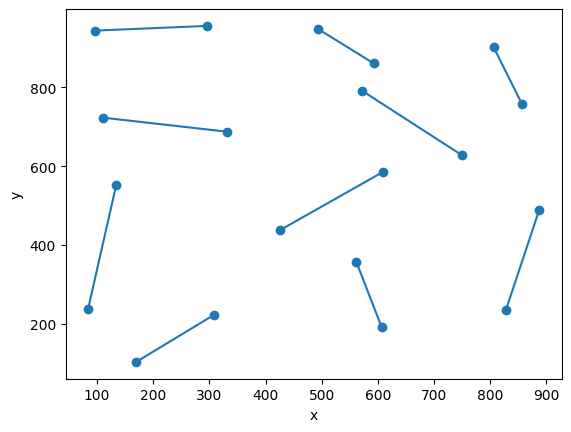

In [87]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane1)
vis.add_point([wygenerowane1[i//2][i%2] for i in range(2*len(wygenerowane1))])
vis.show()

In [34]:
# %matplotlib tk

# wygenerowane2 = add_sections()

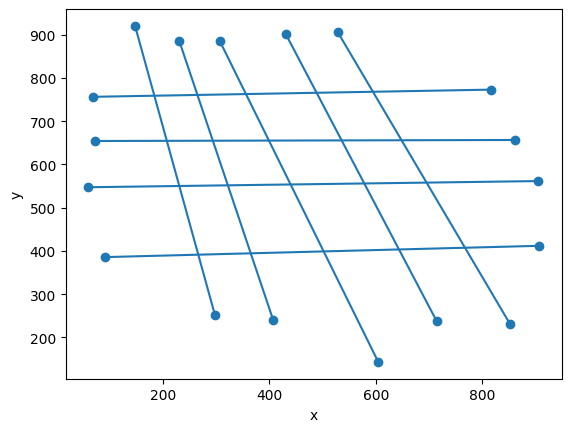

In [35]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane2)
vis.add_point([wygenerowane2[i//2][i%2] for i in range(2*len(wygenerowane2))])
vis.show()

In [36]:
# %matplotlib tk

# wygenerowane3 = add_sections()

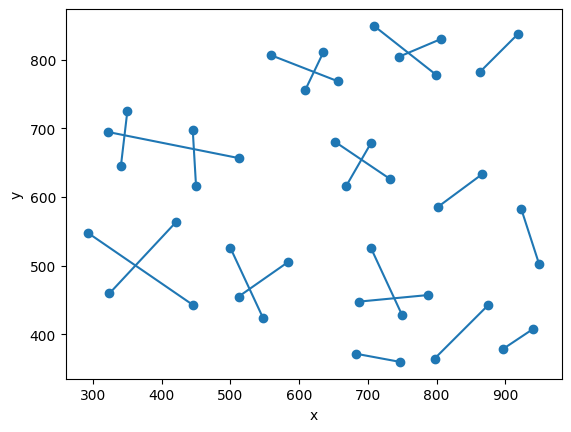

In [37]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane3)
vis.add_point([wygenerowane3[i//2][i%2] for i in range(2*len(wygenerowane3))])
vis.show()

In [38]:
# %matplotlib tk
# wygenerowane4 = add_sections()

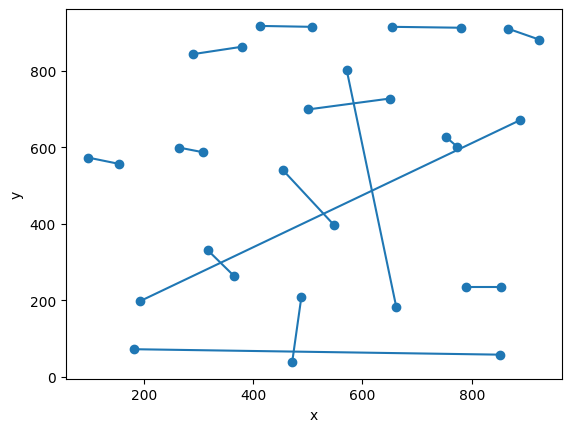

In [39]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane4)
vis.add_point([wygenerowane4[i//2][i%2] for i in range(2*len(wygenerowane4))])
vis.show()

In [40]:
# %matplotlib tk
# wygenerowane5 = add_sections()

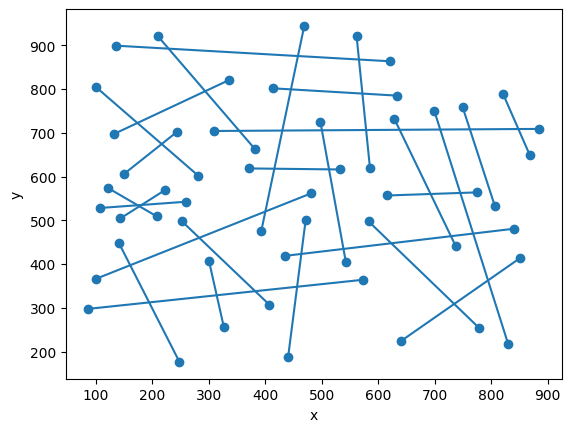

In [41]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(wygenerowane5)
vis.add_point([wygenerowane5[i//2][i%2] for i in range(2*len(wygenerowane5))])
vis.show()

In [88]:
vis.clear()
bool_value, vis= find_intersections_with_visualization(wygenerowane1)
vis.show_gif(interval=50)
vis.save_gif(filename='wygenerowane1', interval=50)

In [43]:
vis.clear()
bool_value, vis= find_intersections_with_visualization(wygenerowane2)
vis.show_gif(interval=50)
vis.save_gif(filename='wygenerowane2', interval=50)

In [44]:
vis.clear()
bool_value, vis= find_intersections_with_visualization(wygenerowane3)
vis.show_gif(interval=50)
vis.save_gif(filename='wygenerowane3', interval=50)

In [45]:
vis.clear()
bool_value, vis= find_intersections_with_visualization(wygenerowane4)
vis.show_gif(interval=50)
vis.save_gif(filename='wygenerowane4', interval=50)

In [46]:
vis.clear()
bool_value, vis= find_intersections_with_visualization(wygenerowane5)
vis.show_gif(interval=50)
vis.save_gif(filename='wygenerowane5', interval=50)

In [47]:
def draw_save(segments, name):
    vis = Visualizer()
    points = segments
    vis.add_polygon(segments, fill=False, color = "orange")
    vis.add_point(segments,color = "orange")
    vis.save(filename = name)

In [48]:
draw_save(wygenerowane1, "generated1")
draw_save(wygenerowane2, "generated2")
draw_save(wygenerowane3, "generated3")
draw_save(wygenerowane4, "generated4")
draw_save(wygenerowane5, "generated5")

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.